# Load data

In [1]:
import sys
sys.path.append('/home/hamid/Desktop/EnsembleTools/')

In [2]:
from dpet.ensemble import Ensemble
from dpet.ensemble_analysis import EnsembleAnalysis
from dpet.visualization import Visualization

ensembles = [
    
    Ensemble(code='PED00156e001', database='ped'),
    Ensemble(code='PED00157e001', database='ped'),
    Ensemble(code='PED00158e001', database='ped')
]
data_dir = '/home/hamid/PED_Data_analysis/nikola'
analysis = EnsembleAnalysis(ensembles=ensembles, output_dir=data_dir)
analysis.load_trajectories()


/home/hamid/anaconda3/envs/ped/lib/python3.11/site-packages/neo_force_scheme/distances.py:1086: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()


Ensemble PED00156e001 already downloaded. Skipping.
File PED00156e001.pdb already exists. Skipping extraction.
Ensemble PED00157e001 already downloaded. Skipping.
File PED00157e001.pdb already exists. Skipping extraction.
Ensemble PED00158e001 already downloaded. Skipping.
File PED00158e001.pdb already exists. Skipping extraction.
PED00156e001 chain ids: ['A']
Generating trajectory for PED00156e001...
Generated trajectory saved to /home/hamid/PED_Data_analysis/nikola.
PED00157e001 chain ids: ['A']
Generating trajectory for PED00157e001...
Generated trajectory saved to /home/hamid/PED_Data_analysis/nikola.
PED00158e001 chain ids: ['A']
Generating trajectory for PED00158e001...
Generated trajectory saved to /home/hamid/PED_Data_analysis/nikola.


{'PED00156e001': <mdtraj.Trajectory with 100 frames, 941 atoms, 59 residues, without unitcells at 0x740222f4fa50>,
 'PED00157e001': <mdtraj.Trajectory with 100 frames, 939 atoms, 59 residues, without unitcells at 0x74021adda6d0>,
 'PED00158e001': <mdtraj.Trajectory with 88 frames, 939 atoms, 59 residues, without unitcells at 0x74021badeb10>}

# Flory scaling exponent (v)

In [4]:
print("# Flory scaling exponents")
v_values = analysis.get_features("flory_exponent")
for code in v_values:
    print(f"{code}: {v_values[code]:.4f}")

# Flory scaling exponents
PED00156e001: 0.6002
PED00157e001: 0.5550
PED00158e001: 0.5729


# end-to-end on Rg

In [5]:
vis = Visualization(analysis=analysis)

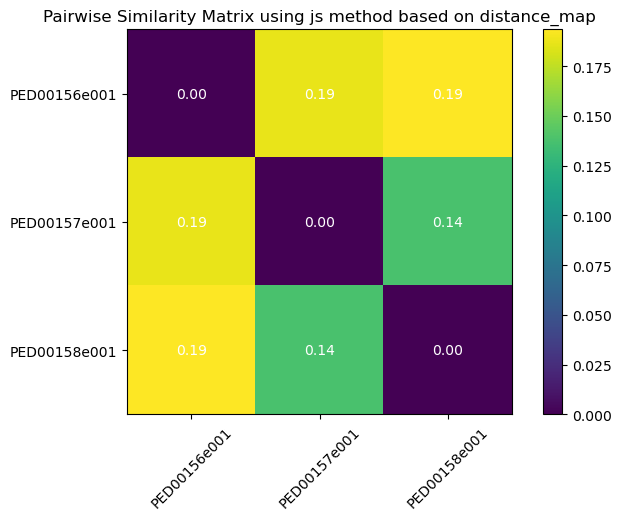

<Axes: title={'center': 'Pairwise Similarity Matrix using js method based on distance_map'}>

In [8]:
vis.similarity_matrix(score_type='js', based_on='distance_map', figsize=(8,5))

# Raw end-to-end distances


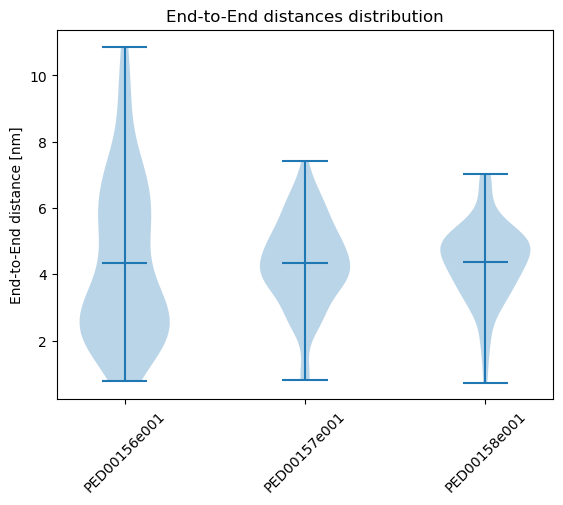

In [9]:
print("# Raw end-to-end distances")
_ = vis.end_to_end_distances(violin_plot=True, median=False, means=True)

# Raw end-to-end distances normalized on average Rg


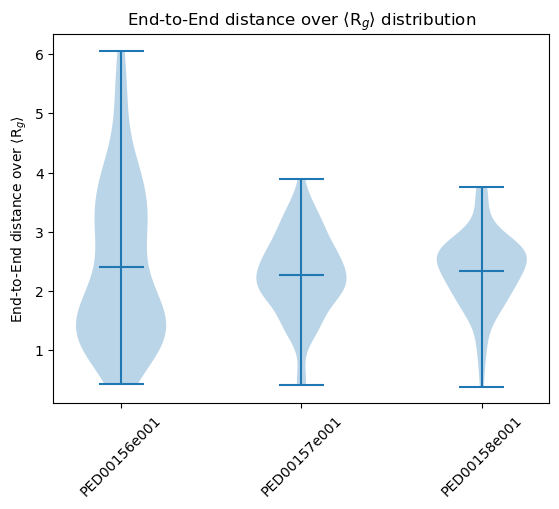

In [10]:
print("# Raw end-to-end distances normalized on average Rg")
_ = vis.end_to_end_distances(rg_norm=True, violin_plot=True, median=False, means=True)

# Summary

In [11]:
summary = analysis.get_features_summary_dataframe(
    selected_features=["rg", "end_to_end", "ee_on_rg", "flory_exponent"],
    show_variability=False
)
display(summary)

,ensemble_code,n_residues,n_conformers,rg_mean,end_to_end_mean,ee_on_rg_mean,flory_exponent
0,PED00156e001,59,100,1.793522,4.334907,2.416979,0.600232
1,PED00157e001,59,100,1.908008,4.339479,2.274351,0.555003
2,PED00158e001,59,88,1.867024,4.378268,2.345052,0.572923
